variance is: 3.0
expectation is: 3.0


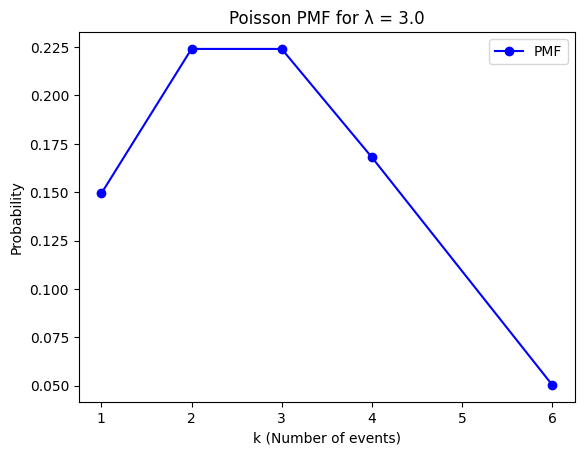

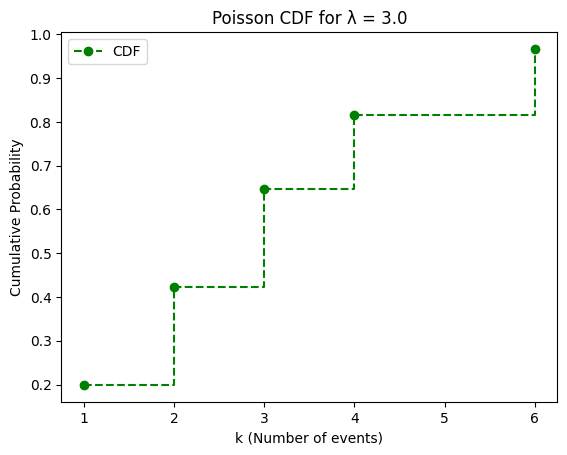

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math

def generate_poisson(lambda_val, size):
    poisson_values = np.random.poisson(lambda_val, size)
    return poisson_values

def poisson_pmf(k, lambda_val):  
    return (lambda_val**k * math.exp(-lambda_val)) / math.factorial(k)

def poisson_cdf(k, lambda_val):
    cdf = 0.0
    for i in range(k + 1):
        cdf += poisson_pmf(i, lambda_val)
    return cdf

#Calculate the expectation using the mathematical formula
def poisson_expectation(lambda_param):
    return lambda_param

#Calculate the variance using the mathematical formula
def poisson_variance(lambda_param):
    return lambda_param


def plot_poisson_pmf(lambda_val, size):
    pmf_values = [poisson_pmf(k, lambda_val) for k in unique_values]

    plt.plot(unique_values, pmf_values, marker='o', linestyle='-', color='blue', label='PMF')

    plt.title(f'Poisson PMF for λ = {lambda_val}')
    plt.xlabel('k (Number of events)')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

def plot_poisson_cdf(lambda_val, size):
    cdf_values = [poisson_cdf(k, lambda_val) for k in unique_values]

    plt.step(unique_values, cdf_values, where='post', color='green', linestyle='--', marker='o', label='CDF')
    plt.title(f'Poisson CDF for λ = {lambda_val}')
    plt.xlabel('k (Number of events)')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.show()

lambda_val = 3.0
size = 10
poisson_values = generate_poisson(lambda_val, size)
unique_values = np.unique(poisson_values)


print("variance is:", poisson_variance(lambda_val))
print("expectation is:", poisson_expectation(lambda_val))

plot_poisson_pmf(lambda_val, size)
plot_poisson_cdf(lambda_val, size)
